# **AxxendCorp AI/ML Assessment**

***Project Goal :***
Build a machine learning model to predict house prices based on different features such as
size, location, and number of rooms. The project should demonstrate data preprocessing,
model training, evaluation, and reporting of insights.

In [542]:
# Code for uploading kaggle notebook for the dataset given
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lespin/house-prices-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'house-prices-dataset' dataset.
Path to dataset files: /kaggle/input/house-prices-dataset


**DATA UNDERSTANDING AND CLEANING**

In [543]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [544]:
# Loading dataset using pandas
data = pd.read_csv( path + "/train.csv")
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [545]:
data.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd        NaN   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd        NaN   
1458          1996       Hip  CompShg     MetalSd     MetalSd        NaN   
1459          1965     Gable  CompShg     HdBoard     HdBoard        NaN   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [546]:
len(data)

1460

**Loaded Head section a tail section of the data above to see the features involved**

In [547]:
data.shape  # There are 81 features with 1460 observations in the data

(1460, 81)

In [548]:
data.nunique()  # This tells the number of unique observations or rows per feature

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753
2ndFlrSF          417
LowQualFinSF       24
GrLivArea         861
BsmtFullBath        4
BsmtHalfBath        3
FullBath            4
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
KitchenQual         4
TotRmsAbvGrd       12
Functional          7
Fireplaces          4
FireplaceQu         5
GarageType          6
GarageYrBlt        97
GarageFinish        3
GarageCars          5
GarageArea        441
GarageQual          5
GarageCond          5
PavedDrive          3
WoodDeckSF        274
OpenPorchSF       202
EnclosedPorch     120
3SsnPorch          20
ScreenPorch        76
PoolArea            8
PoolQC              3
Fence               4
MiscFeature         4
MiscVal            21
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
dtype: int64

In [549]:
pd.set_option('display.max_rows', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Data above shows the information about the data including the number of observations per feature and also shows if the data is balanced as well as the data types of each feature.**

In [550]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

**Description of the data which includes the number of observations or rows per feature, the mean , standard deviation and other attributes which will help later on when cleaning the dataset.**

In [551]:
data.isnull().sum() #This code helps to know the number of null values in each feature attribute.

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

**There are 43 categorical attributes in the underying data.Next up, Checking the attributes with null values. ref: data.info().**

In [552]:
print(len(data.isnull().sum()[data.isnull().sum() > 0])) # Number of null attributes
print(data.isnull().sum()[data.isnull().sum() > 0])


19
LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


**Code above shows the attributes with null values.**

In [553]:
import seaborn as sns
from matplotlib import pyplot as plt

# sns.boxplot(y=data["LotFrontage"])
# plt.show()

# print(data["LotFrontage"][data["LotFrontage"].isnull()])
# print(data["LotFrontage"].describe())
data_with_null = data.isnull().sum()[data.isnull().sum() > 0]
# print(data_with_null.index)
index = data_with_null.index
for i in index:
    print(data[i].describe())


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object
count         588
unique          3
top       BrkFace
freq          445
Name: MasVnrType, dtype: object
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count     1423
unique       4
top         TA
freq       649
Name: BsmtQual, dtype: object
count     1423
unique       4
top         TA
freq      1311
Name: BsmtCond, dtype: object
count     1422
unique       4
top         No
freq       953
Name: BsmtExposure, dtype: object
count     1423
unique       6
top        Unf
freq       430
Name: BsmtFinType1, dtype: object
count     1422
unique       6
top     

**Data above describes the attributes with the null values to help get rid of null values. First we look at each attribute and figure out how to fill them.**




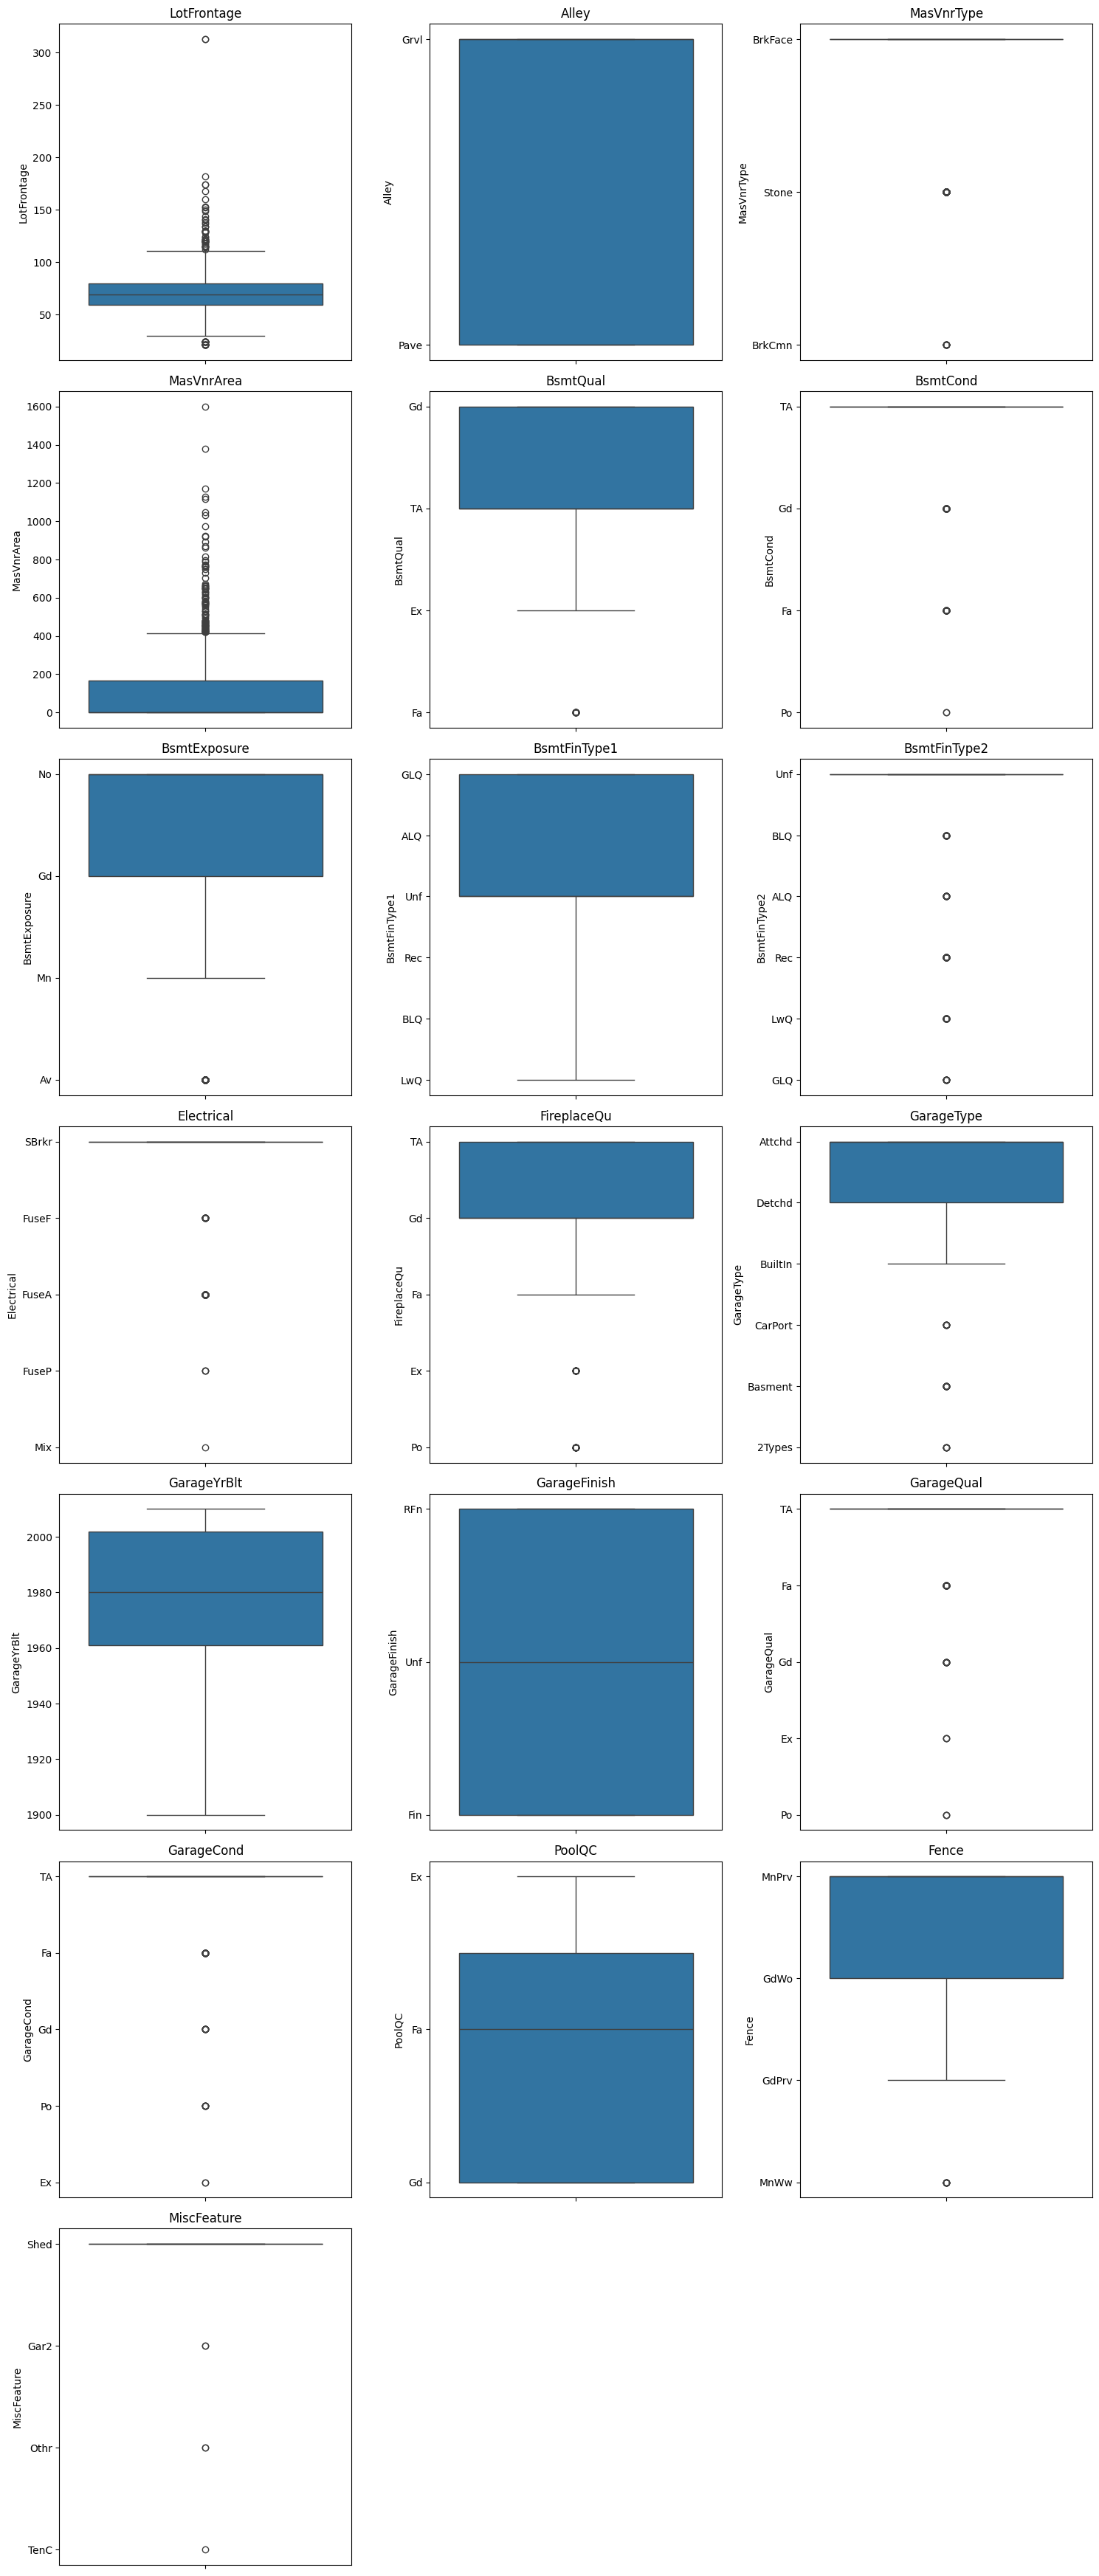

In [554]:
n = len(index)
rows = (n // 3) + 1
cols = 3
plt.figure(figsize=(15, 5 * rows))
for i, col in enumerate(index, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


**Box plot is to check for the skewness of the data and other properties to help determine how to fill the null values.**

In [555]:
data.fillna({"LotFrontage": 69}, inplace=True)
data.fillna({"Alley": "No Alley"}, inplace=True)
data.fillna({"MasVnrType": "None"}, inplace=True)
data.fillna({"MasVnrArea": 0}, inplace=True)
data.fillna({"BsmtQual": "No Basement"}, inplace=True)
data.fillna({"BsmtCond": "No Basement"}, inplace=True)
data.fillna({"BsmtExposure": "No Basement"}, inplace=True)
data.fillna({"BsmtFinType1": "No Basement"}, inplace=True)
data.fillna({"BsmtFinType2": "No Basement"}, inplace=True)
data.fillna({"Electrical": "SBrkr"}, inplace=True)
data.fillna({"FireplaceQu": "No Fireplace"}, inplace=True)
data.fillna({"GarageType": "No Garage"}, inplace=True)
data.fillna({"GarageYrBlt": 0}, inplace=True)
data.fillna({"GarageFinish": "No Garage"}, inplace=True)
data.fillna({"GarageQual": "No Garage"}, inplace=True)
data.fillna({"GarageCond": "No Garage"}, inplace=True)
data.fillna({"PoolQC": "No Pool"}, inplace=True)
data.fillna({"Fence": "No Fence"}, inplace=True)
data.fillna({"MiscFeature": "None"}, inplace=True)

In [556]:
# Save data filled from here for ETL Pipeline and modelling.
data.to_csv("fill_null_data.csv", index=False)

In [557]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [558]:
print(data.isnull().sum()) # Now checking the data, we have all fields filled

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [559]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  No Alley      Reg   
1   2          20       RL         80.0     9600   Pave  No Alley      Reg   
2   3          60       RL         68.0    11250   Pave  No Alley      IR1   
3   4          70       RL         60.0     9550   Pave  No Alley      IR1   
4   5          60       RL         84.0    14260   Pave  No Alley      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1          Gd             8        Typ           0   
1             1          TA             6        Typ           1   
2             1          Gd             6        Typ           1   
3             1          Gd             7        Typ           

In [560]:
cate_data = []
for i in data.columns:
  if data[i].dtype.name == "object" or data[i].dtype.name == "bool":
    cate_data.append(i)
print(len(cate_data))  # Number of categorical data
print(cate_data) # List of categorical data

43
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [561]:
# Getting categorical data out of the data for now.

copy_data = data.copy()
copy_data.drop(columns=cate_data, inplace=True)

corr_data = copy_data.corr()
corr_data["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

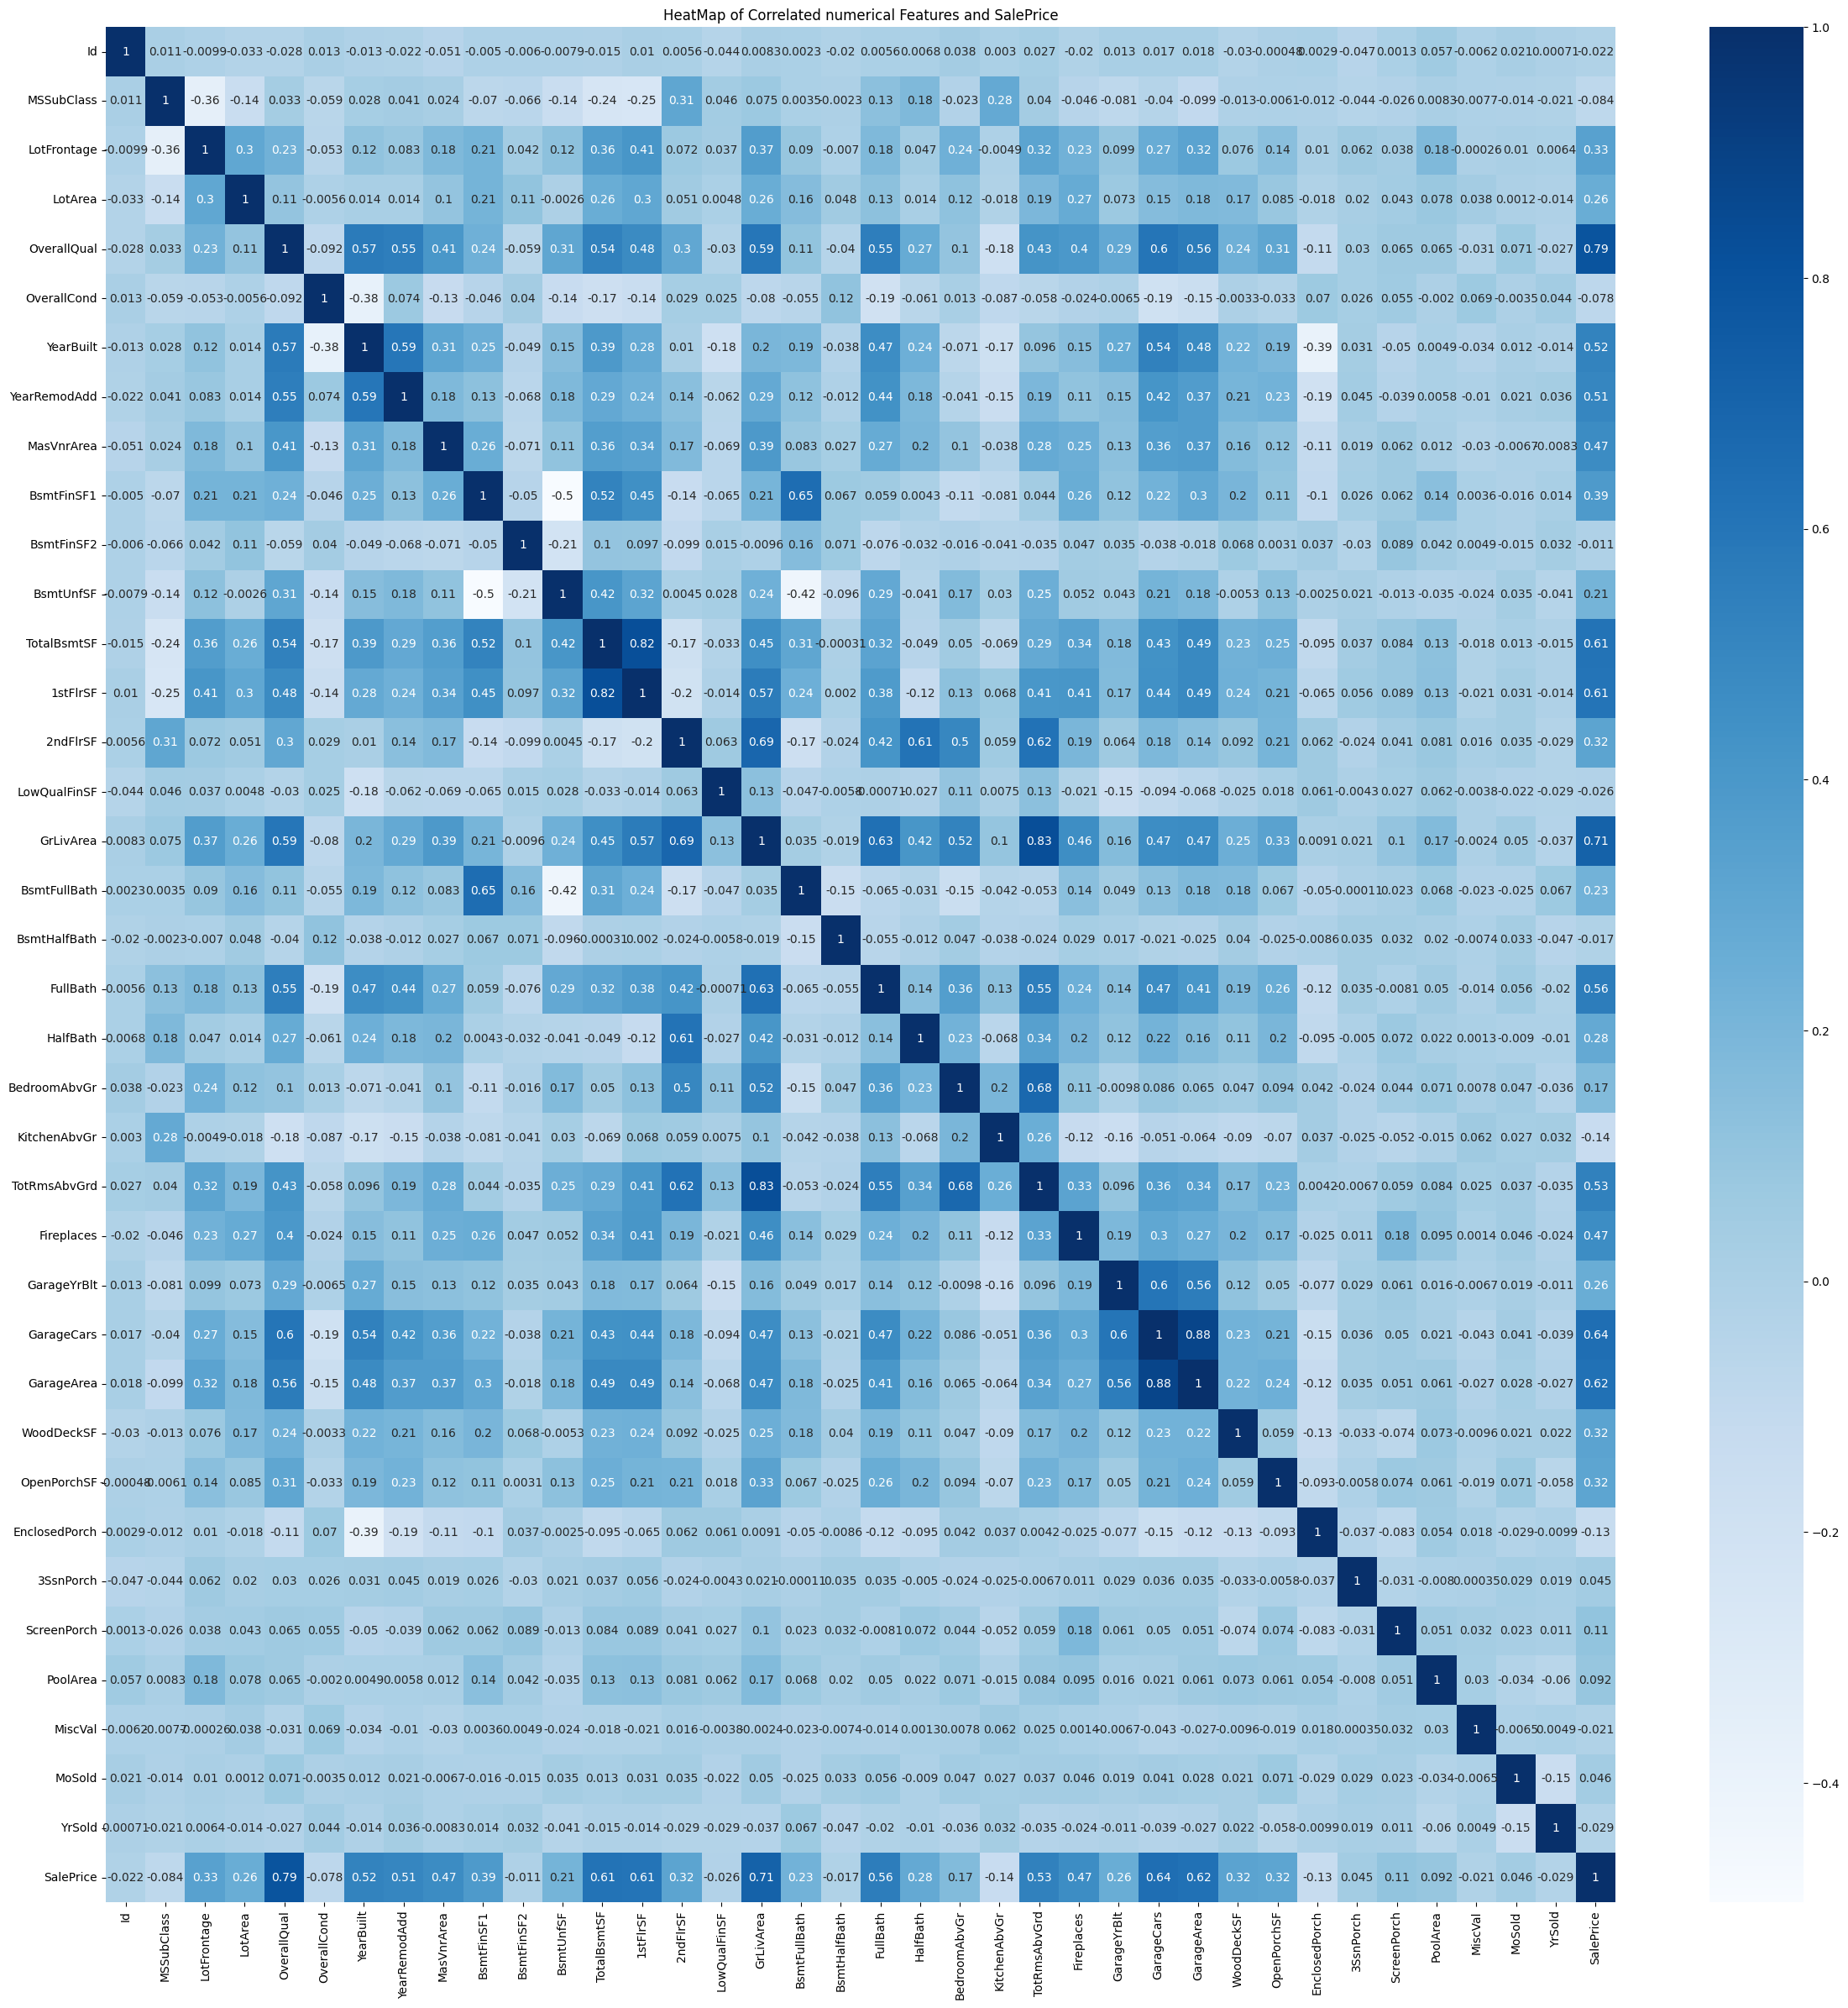

In [562]:

plt.figure(figsize=(29, 29))
plt.title("HeatMap of Correlated numerical Features and SalePrice")
sns.heatmap(corr_data, annot=True, cmap="Blues")
plt.show()

**Features here are numerical and data from continiuous observations are correlated into the heatmap.**

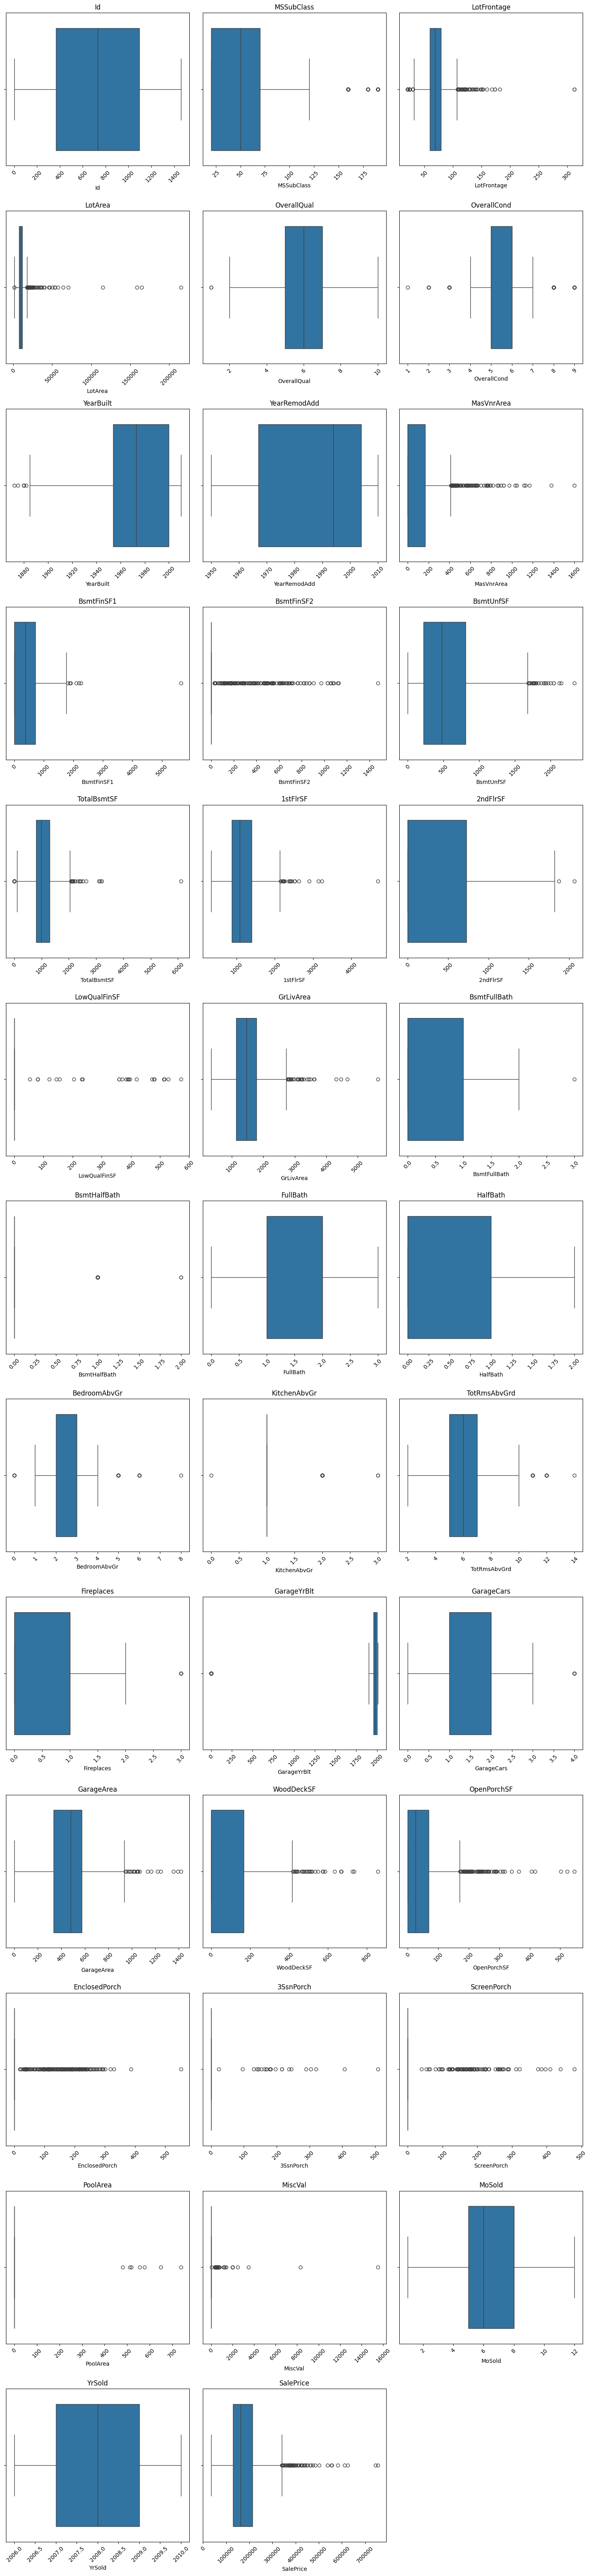

In [563]:
# Boxplot for the numerical attributes to look out for outliers.

num_data = list(copy_data.columns)

def plot_feature_boxplots(data, features, target_col):
    n = len(features)
    rows = (n // 3) + 1
    cols = 3

    plt.figure(figsize=(15, 5 * rows))
    for i, col in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(x=data[col])
        plt.title(f"{col}")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_feature_boxplots(data, num_data, "SalePrice")

In [564]:
# Removes and lists features with correlation to target less than threshold.

def drop_low_correlation(data, target_col, threshold=0.1):
    corr = data.corr()[target_col].drop(target_col)  # correlations with target
    low_corr = corr[abs(corr) < threshold].index.tolist()

    # print(f"Features with correlation < {threshold} to {target_col}:")
    # print(low_corr)

    # return dataset without low-correlation columns
    cleaned_data = data.drop(columns=low_corr)
    return low_corr


In [565]:
print(drop_low_correlation(copy_data, "SalePrice", 0.1)) # Numeric Features to drop when working on the model

['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [566]:
pd.set_option('display.max_colwidth', None)
# data.head()
cate_df = data[cate_data].copy()
unique_values = {col: cate_df[col].unique() for col in cate_df.columns}
pd.Series(unique_values)

MSZoning                                                                                                                                                                                                        [RL, RM, C (all), FV, RH]
Street                                                                                                                                                                                                                       [Pave, Grvl]
Alley                                                                                                                                                                                                              [No Alley, Grvl, Pave]
LotShape                                                                                                                                                                                                             [Reg, IR1, IR2, IR3]
LandContour                                                                                                                                                                                                          [Lvl, Bnk, Low, HLS]
Utilities                                                                                                                                                                                                                [AllPub, NoSeWa]
LotConfig                                                                                                                                                                                             [Inside, FR2, Corner, CulDSac, FR3]
LandSlope                                                                                                                                                                                                                 [Gtl, Mod, Sev]
Neighborhood     [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, Somerst, NWAmes, OldTown, BrkSide, Sawyer, NridgHt, NAmes, SawyerW, IDOTRR, MeadowV, Edwards, Timber, Gilbert, StoneBr, ClearCr, NPkVill, Blmngtn, BrDale, SWISU, Blueste]
Condition1                                                                                                                                                                      [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, PosA, RRNe]
Condition2                                                                                                                                                                            [Norm, Artery, RRNn, Feedr, PosN, PosA, RRAn, RRAe]
BldgType                                                                                                                                                                                            [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
HouseStyle                                                                                                                                                                 [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl, 2.5Unf, 2.5Fin]
RoofStyle                                                                                                                                                                                      [Gable, Hip, Gambrel, Mansard, Flat, Shed]
RoofMatl                                                                                                                                                              [CompShg, WdShngl, Metal, WdShake, Membran, Tar&Grv, Roll, ClyTile]
Exterior1st                                                                                           [VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, WdShing, CemntBd, Plywood, AsbShng, Stucco, BrkComm, AsphShn, Stone, ImStucc, CBlock]
Exterior2nd                                                                                    [VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, Wd Sdng, CmentBd, BrkFace, Stucco, AsbShng, Brk Cmn, ImStucc, AsphShn, Stone, Other, CBlock]
MasVnrType            

**Observing categorical data to see which one is ordinal and nominal.**

In [567]:
cate_ord = ["LotShape", "LandSlope", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
    "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual",
    "Functional", "FireplaceQu", "GarageQual", "GarageCond", "GarageFinish", "PoolQC"] # Data which are in order and can be used to rank

cate_norm = [col for col in cate_data if col not in cate_ord]

print("Ordinal columns:", cate_ord)
print("\nNominal columns:", cate_norm)

Ordinal columns: ['LotShape', 'LandSlope', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageFinish', 'PoolQC']

Nominal columns: ['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


**Separated Ordinal category from nominal category.**

In [568]:
# Changing ordinal data to numeric data and calculating the correlation 

from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
copy_data[cate_ord] = ord_enc.fit_transform(data[cate_ord])

corr_data_ord = copy_data[cate_ord + ["SalePrice"]].corr(method="spearman")
corr_data_ord["SalePrice"].sort_values(ascending=False)


SalePrice       1.000000
GarageCond      0.346180
GarageQual      0.317621
Functional      0.135267
ExterCond       0.128255
BsmtCond        0.124367
BsmtFinType2    0.123766
LandSlope       0.050310
PoolQC         -0.058495
BsmtFinType1   -0.069003
FireplaceQu    -0.117030
LotShape       -0.305923
BsmtExposure   -0.320961
HeatingQC      -0.471338
GarageFinish   -0.478904
KitchenQual    -0.569857
BsmtQual       -0.571441
ExterQual      -0.633315
Name: SalePrice, dtype: float64

In [569]:
print(drop_low_correlation(copy_data[cate_ord + ["SalePrice"] ], "SalePrice", 0.1)) # remaining Features to drop when working on the model, ordinal. Copy_data has been updated

['LandSlope', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu']


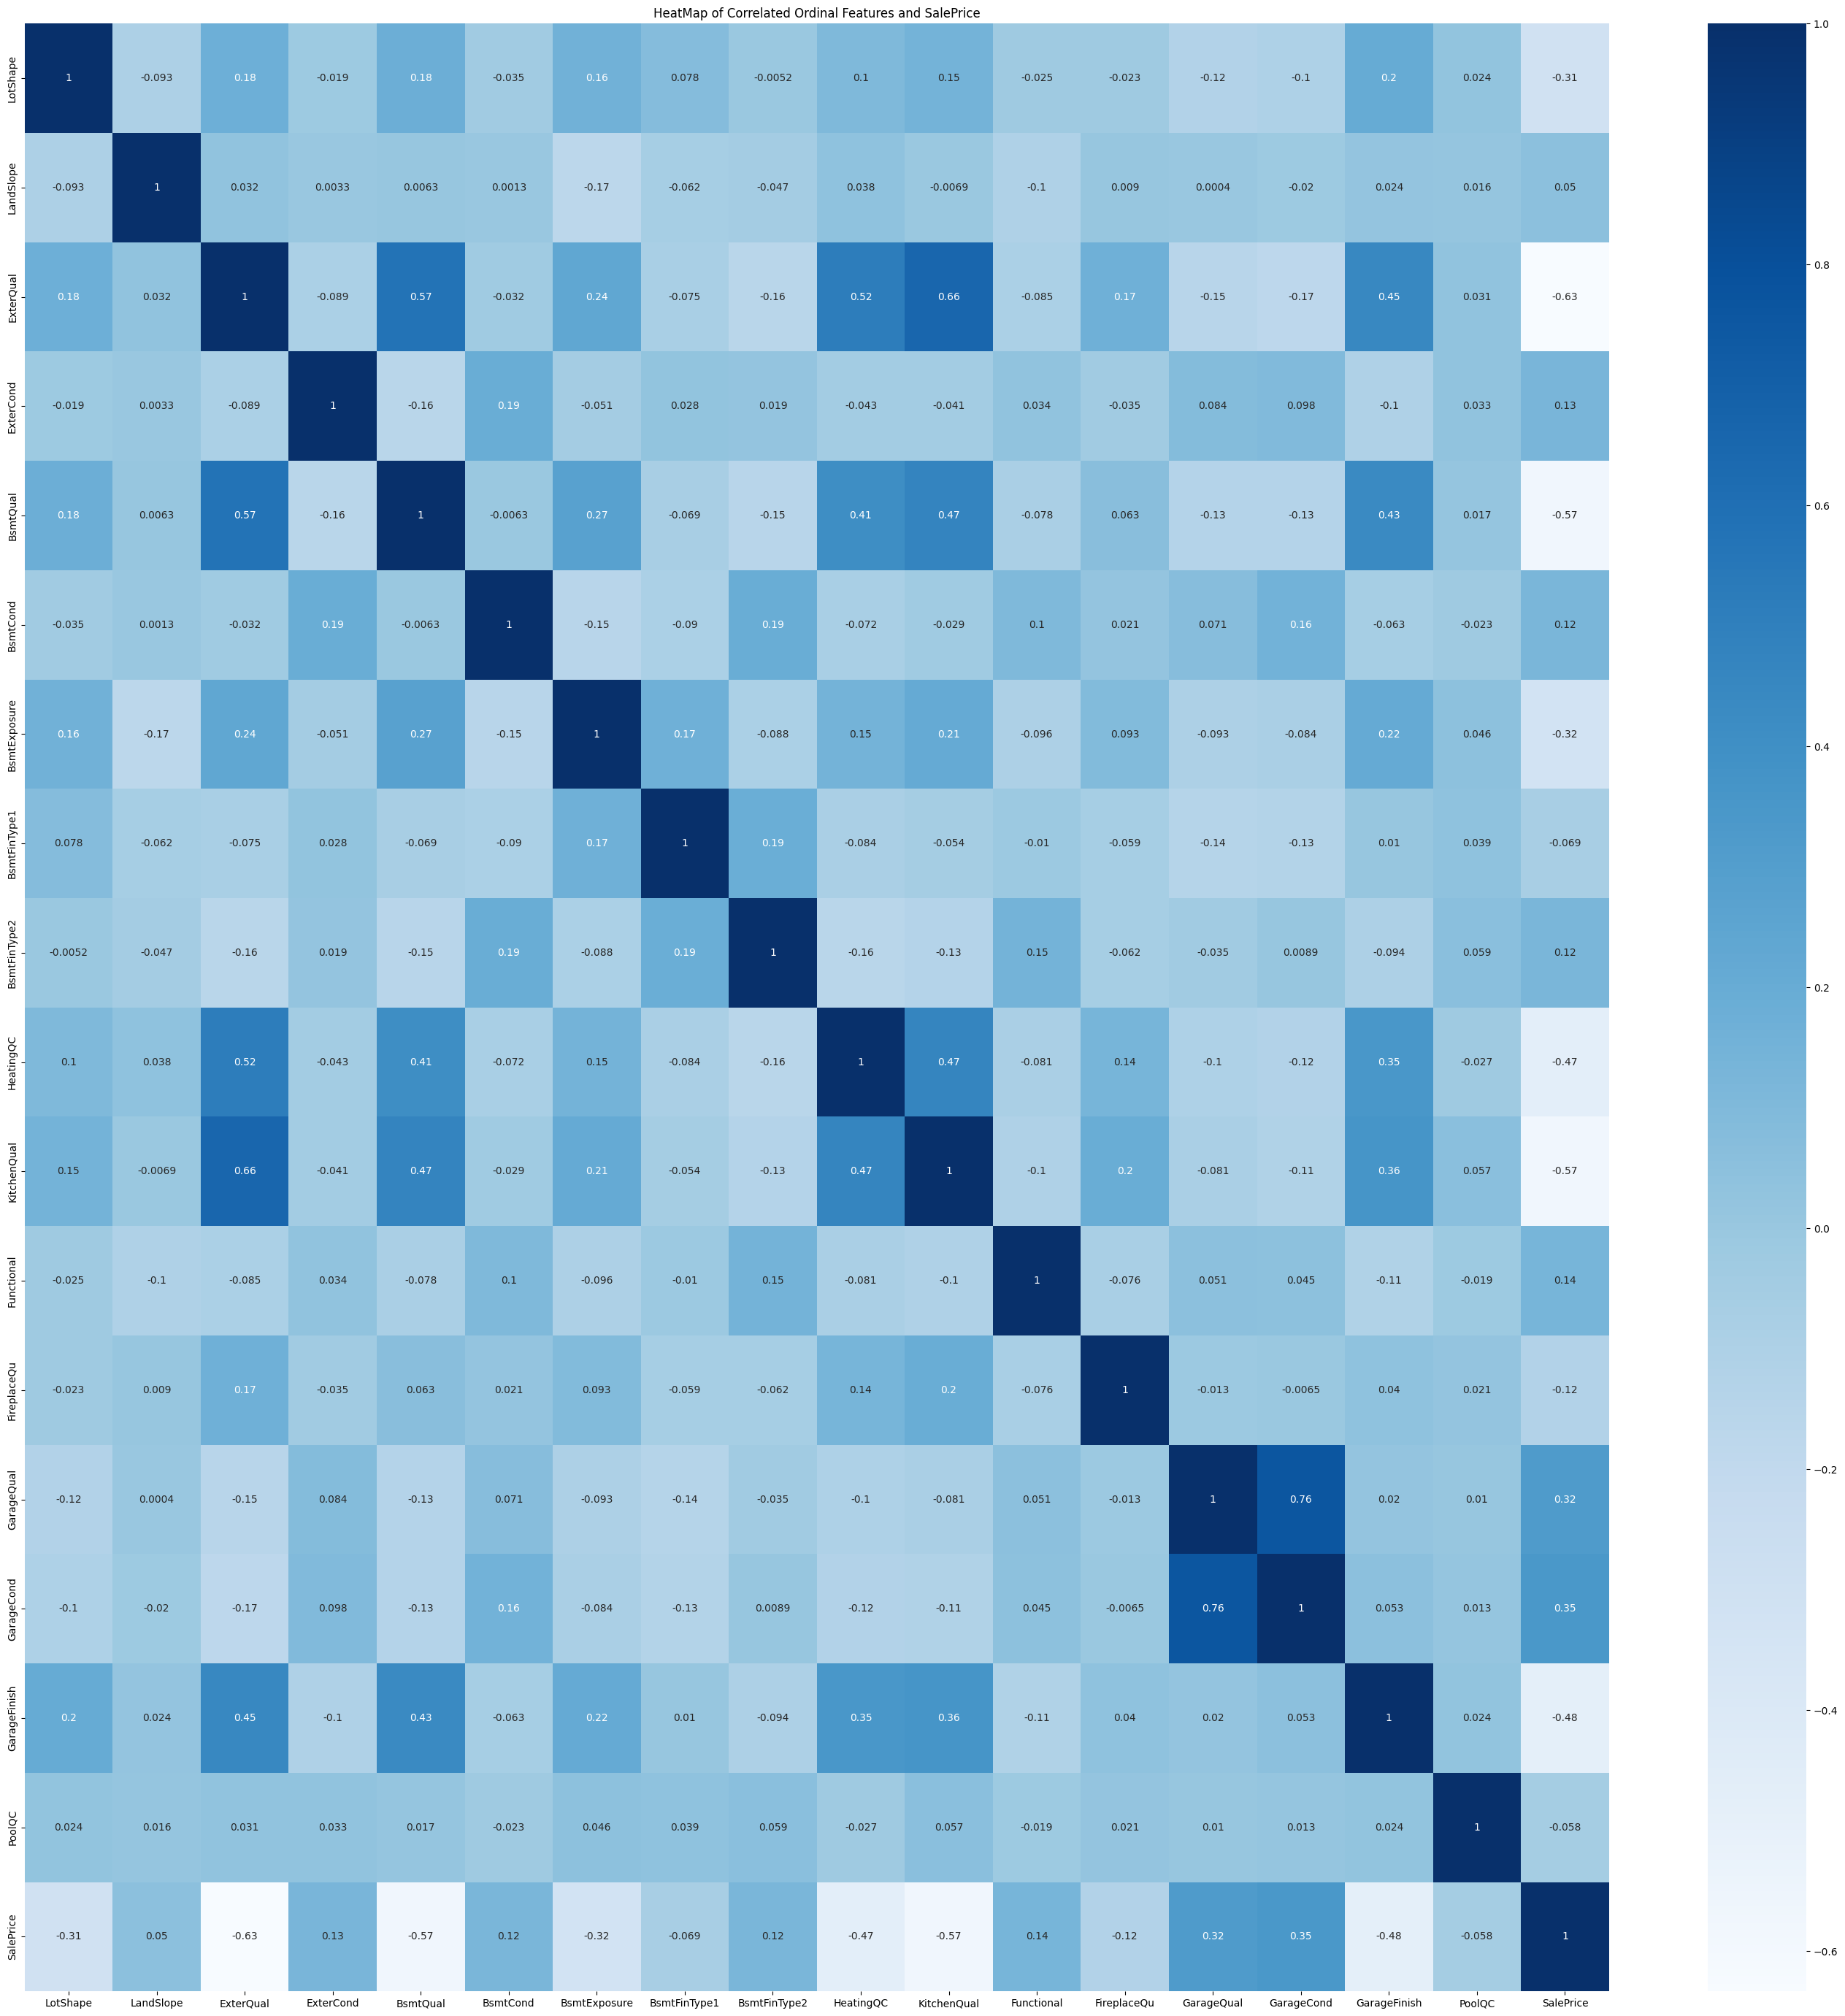

In [570]:
plt.figure(figsize=(35, 35))
plt.title("HeatMap of Correlated Ordinal Features and SalePrice")
sns.heatmap(corr_data_ord, annot=True, cmap="Blues")
plt.show()

In [571]:
# Calculating nominal correlation with price


print(cate_norm) # Norminal price attributes

['MSZoning', 'Street', 'Alley', 'LandContour', 'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']



**Apply one-hot encoding to the nominal categorical features**


In [572]:
from sklearn.preprocessing import OneHotEncoder

cate_norm_df = data[cate_norm].copy()
onehot_enc = OneHotEncoder(sparse_output=False)
data_onehot_array = onehot_enc.fit_transform(cate_norm_df)
data_onehot_norm = pd.DataFrame(data_onehot_array, columns=onehot_enc.get_feature_names_out(cate_norm))

display(data_onehot_norm.head(3))

MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0.0          0.0          0.0          1.0          0.0   
1               0.0          0.0          0.0          1.0          0.0   
2               0.0          0.0          0.0          1.0          0.0   

   Street_Grvl  Street_Pave  Alley_Grvl  Alley_No Alley  Alley_Pave  \
0          0.0          1.0         0.0             1.0         0.0   
1          0.0          1.0         0.0             1.0         0.0   
2          0.0          1.0         0.0             1.0         0.0   

   LandContour_Bnk  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
0              0.0              0.0              0.0              1.0   
1              0.0              0.0              0.0              1.0   
2              0.0              0.0              0.0              1.0   

   Utilities_AllPub  Utilities_NoSeWa  LotConfig_Corner  LotConfig_CulDSac  \
0               1.0               0.0               0.0                0.0   
1               1.0               0.0               0.0                0.0   
2               1.0               0.0               0.0                0.0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  Neighborhood_Blmngtn  \
0            0.0            0.0               1.0                   0.0   
1            1.0            0.0               0.0                   0.0   
2            0.0            0.0               1.0                   0.0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                   0.0                   1.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   1.0                   0.0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                   0.0                   0.0                  0.0   
1                   0.0                   0.0                  0.0   
2                   0.0                   0.0                  0.0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                   0.0                   0.0                 0.0   
1                   0.0                   0.0                 0.0   
2                   0.0                   0.0                 0.0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   0.0   
2                   0.0                  0.0                   0.0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                   0.0                   0.0                 0.0   
1                   0.0                   0.0                 0.0   
2                   0.0                   0.0                 0.0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                  0.0                   0.0                   0.0   
1                  0.0                   0.0                   0.0   
2                  0.0                   0.0                   0.0   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
0                   0.0                  0.0                   0.0   
1                   0.0                  0.0                   1.0   
2                   0.0                  0.0                   0.0   

   Condition1_Artery  Condition1_Feedr  Condition1_Norm  Condition1_PosA  \
0                0.0               0.0              1.0              0.0   
1                0.0               1.0              0.0              0.0   
2                0.0               0.0

In [573]:
# Combine the numerical and ordinal data with the one-hot encoded nominal data
data_combined = pd.concat([copy_data, data_onehot_norm], axis=1)

# Drop the columns with low correlation to SalePrice
low_corr_numeric = ['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
low_corr_ordinal = ['LandSlope', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu']

columns_to_drop = low_corr_numeric + low_corr_ordinal

# Ensure the columns exist before dropping
columns_to_drop_existing = [col for col in columns_to_drop if col in data_combined.columns]

data_cleaned = data_combined.drop(columns=columns_to_drop_existing)

print("Shape of the cleaned data:", data_cleaned.shape)
display(data_cleaned.head())

Shape of the cleaned data: (1460, 218)


LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0     8450            7       2003          2003       196.0   
1         80.0     9600            6       1976          1976         0.0   
2         68.0    11250            7       2001          2002       162.0   
3         60.0     9550            7       1915          1970         0.0   
4         84.0    14260            8       2000          2000       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0         706        150          856       856       854       1710   
1         978        284         1262      1262         0       1262   
2         486        434          920       920       866       1786   
3         216        540          756       961       756       1717   
4         655        490         1145      1145      1053       2198   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             1         2         1             3             1             8   
1             0         2         0             3             1             6   
2             1         2         1             3             1             6   
3             1         1         0             3             1             7   
4             1         2         1             4             1             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0           0       2003.0           2         548           0           61   
1           1       1976.0           2         460         298            0   
2           1       2001.0           2         608           0           42   
3           1       1998.0           3         642           0           35   
4           1       2000.0           3         836         192           84   

   EnclosedPorch  ScreenPorch  SalePrice  LotShape  ExterQual  ExterCond  \
0              0            0     208500       3.0        2.0        4.0   
1              0            0     181500       3.0        3.0        4.0   
2              0            0     223500       0.0        2.0        4.0   
3            272            0     140000       0.0        3.0        4.0   
4              0            0     250000       0.0        2.0        4.0   

   BsmtQual  BsmtExposure  HeatingQC  KitchenQual  Functional  GarageQual  \
0       2.0           3.0        0.0          2.0         6.0         5.0   
1       2.0           1.0        0.0          3.0         6.0         5.0   
2       2.0           2.0        0.0          2.0         6.0         5.0   
3       4.0           3.0        2.0          2.0         6.0         5.0   
4       2.0           0.0        0.0          2.0         6.0         5.0   

   GarageCond  GarageFinish  PoolQC  MSZoning_C (all)  MSZoning_FV  \
0         5.0           2.0     3.0               0.0          0.0   
1         5.0           2.0     3.0               0.0          0.0   
2         5.0           2.0     3.0               0.0          0.0   
3         5.0           3.0     3.0               0.0          0.0   
4         5.0           2.0     3.0               0.0          0.0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0          0.0          1.0          0.0          0.0          1.0   
1          0.0          1.0          0.0          0.0          1.0   
2          0.0          1.0          0.0          0.0          1.0   
3          0.0          1.0          0.0          0.0          1.0   
4          0.0          1.0          0.0          0.0          1.0   

   Alley_Grvl  Alley_No Alley  Alley_Pave  LandContour_Bnk  LandContour_HLS  \
0         0.0             1.0         0.0              0.0              0.0   
1         0.0             1.0         0.0              0.0              0.0   
2         0.0             1.0         0.0              0.0              0.0   
3         0.0             1.0         0.0              0.0         

In [574]:
data_cleaned.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=218)

**Now we are handling outliers from the clean data we have.**

In [575]:
# Identify numerical and ordinal features with correlation above the threshold
correlated_features = data_cleaned.columns.tolist()
correlated_features.remove('SalePrice') # Exclude the target variable

print("Features to check for outliers:", correlated_features)

Features to check for outliers: ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'HeatingQC', 'KitchenQual', 'Functional', 'GarageQual', 'GarageCond', 'GarageFinish', 'PoolQC', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Grvl', 'Alley_No Alley', 'Alley_Pave', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale'

In [576]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 218 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(194), int64(24)
memory usage: 2.4 MB


In [577]:
# Capping outliers using the IQR method

for col in correlated_features:
    if data_cleaned[col].dtype != 'object': # Only cap numerical and ordinal features
        Q1 = data_cleaned[col].quantile(0.25)
        Q3 = data_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        upper_bound = Q3 + 1.5 * IQR
        lower_bound = Q1 - 1.5 * IQR

        data_cleaned[col] = data_cleaned[col].clip(lower=lower_bound, upper=upper_bound)

print("Outliers capped in correlated numerical and ordinal features.")

Outliers capped in correlated numerical and ordinal features.


In [578]:
# Verify that outliers have been handled by replotting boxplots for numerical features
num_data_cleaned = data_cleaned.select_dtypes(include=np.number).columns.tolist()
num_data_cleaned.remove('SalePrice')

def plot_feature_boxplots_cleaned(data, features):
    n = len(features)
    rows = (n // 3) + 1
    cols = 3

    plt.figure(figsize=(15, 5 * rows))
    for i, col in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(x=data[col])
        plt.title(f"{col} (Outliers Capped)")
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

plot_feature_boxplots_cleaned(data_cleaned, num_data_cleaned)

### Now heatmap of the cleaned_data to SalePrice

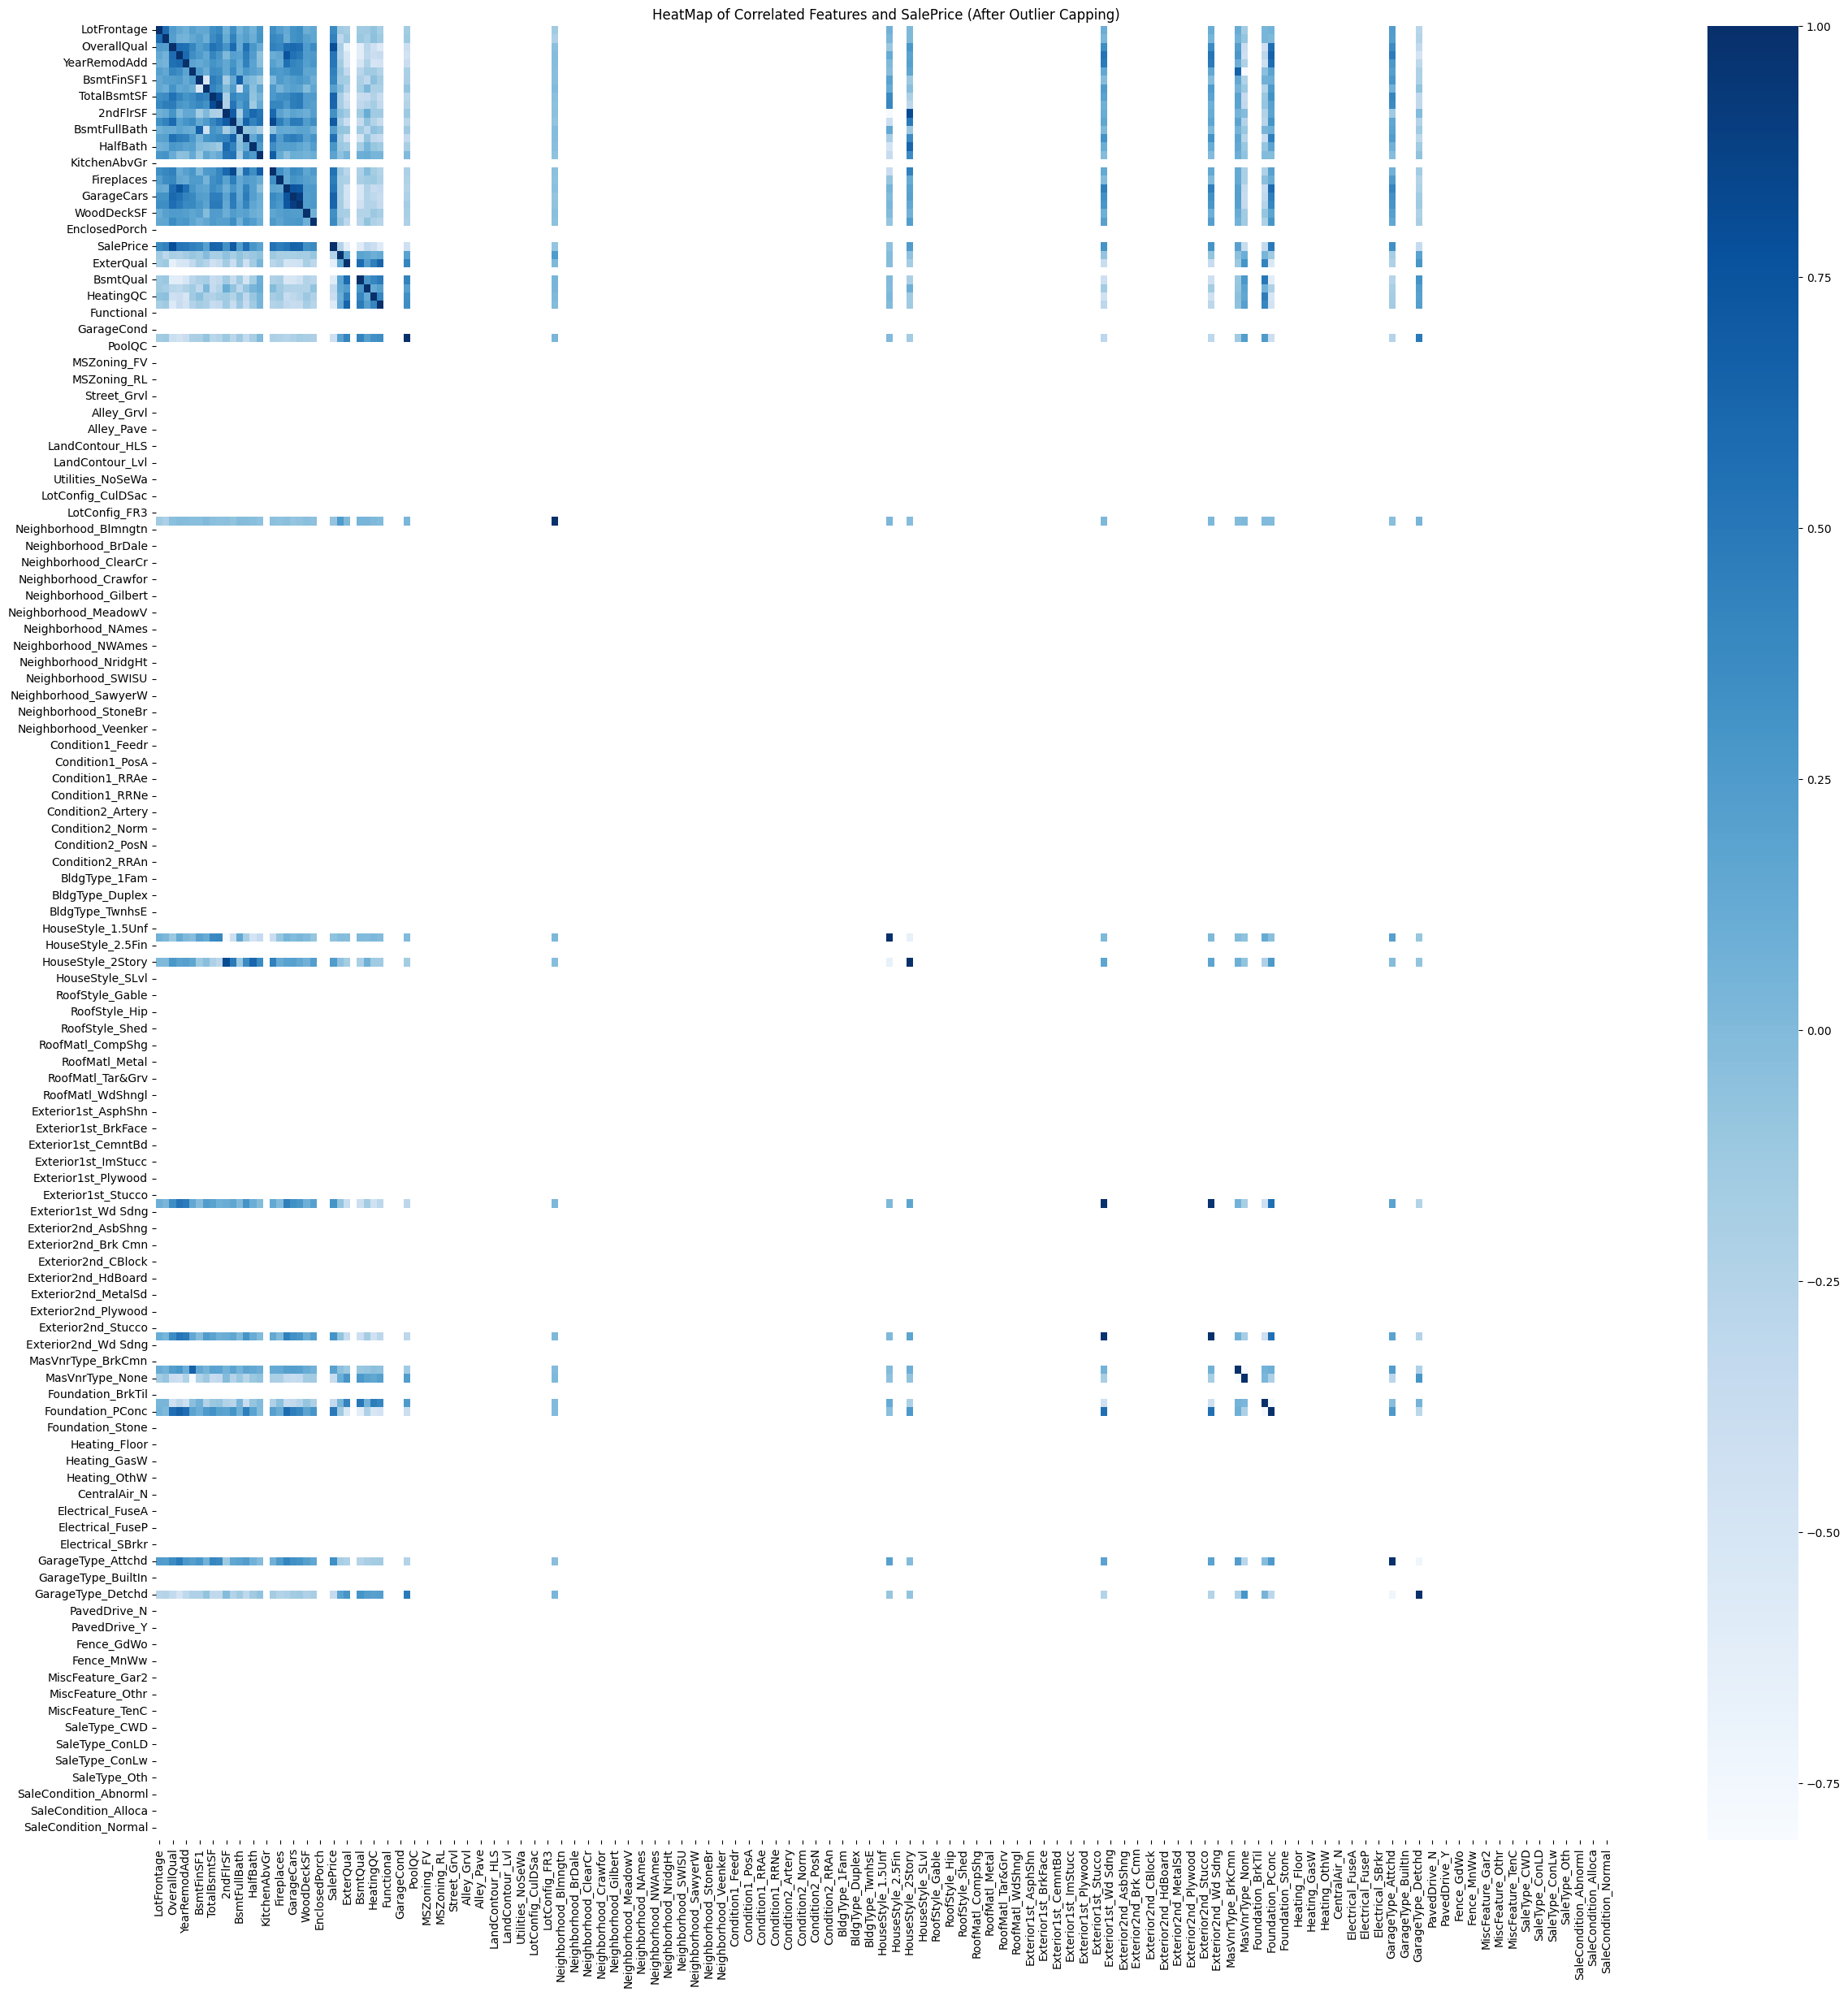

In [579]:
plt.figure(figsize=(29, 29))
plt.title("HeatMap of Correlated Features and SalePrice (After Outlier Capping)")
sns.heatmap(data_cleaned.corr(), annot=False, cmap="Blues")
plt.show()

**Now we look at adding some features to the data.**

In [580]:
data_cleaned.head()

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0   8450.0            7       2003          2003       196.0   
1         80.0   9600.0            6       1976          1976         0.0   
2         68.0  11250.0            7       2001          2002       162.0   
3         60.0   9550.0            7       1915          1970         0.0   
4         84.0  14260.0            8       2000          2000       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0       706.0      150.0          856     856.0       854     1710.0   
1       978.0      284.0         1262    1262.0         0     1262.0   
2       486.0      434.0          920     920.0       866     1786.0   
3       216.0      540.0          756     961.0       756     1717.0   
4       655.0      490.0         1145    1145.0      1053     2198.0   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           1.0         2         1           3.0             1             8   
1           0.0         2         0           3.0             1             6   
2           1.0         2         1           3.0             1             6   
3           1.0         1         0           3.0             1             7   
4           1.0         2         1           4.0             1             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         0.0       2003.0         2.0       548.0           0           61   
1         1.0       1976.0         2.0       460.0         298            0   
2         1.0       2001.0         2.0       608.0           0           42   
3         1.0       1998.0         3.0       642.0           0           35   
4         1.0       2000.0         3.0       836.0         192           84   

   EnclosedPorch  ScreenPorch  SalePrice  LotShape  ExterQual  ExterCond  \
0              0            0     208500       3.0        2.0        4.0   
1              0            0     181500       3.0        3.0        4.0   
2              0            0     223500       0.0        2.0        4.0   
3              0            0     140000       0.0        3.0        4.0   
4              0            0     250000       0.0        2.0        4.0   

   BsmtQual  BsmtExposure  HeatingQC  KitchenQual  Functional  GarageQual  \
0       2.0           3.0        0.0          2.0         6.0         5.0   
1       2.0           1.0        0.0          3.0         6.0         5.0   
2       2.0           2.0        0.0          2.0         6.0         5.0   
3       4.0           3.0        2.0          2.0         6.0         5.0   
4       2.0           0.5        0.0          2.0         6.0         5.0   

   GarageCond  GarageFinish  PoolQC  MSZoning_C (all)  MSZoning_FV  \
0         5.0           2.0     3.0               0.0          0.0   
1         5.0           2.0     3.0               0.0          0.0   
2         5.0           2.0     3.0               0.0          0.0   
3         5.0           3.0     3.0               0.0          0.0   
4         5.0           2.0     3.0               0.0          0.0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0          0.0          1.0          0.0          0.0          1.0   
1          0.0          1.0          0.0          0.0          1.0   
2          0.0          1.0          0.0          0.0          1.0   
3          0.0          1.0          0.0          0.0          1.0   
4          0.0          1.0          0.0          0.0          1.0   

   Alley_Grvl  Alley_No Alley  Alley_Pave  LandContour_Bnk  LandContour_HLS  \
0         0.0             1.0         0.0              0.0              0.0   
1         0.0             1.0         0.0              0.0              0.0   
2         0.0             1.0         0.0              0.0              0.0   
3         0.0             1.0         0.0              0.0         

In [581]:
from datetime import datetime

current_year = datetime.now().year

# Create a new DataFrame for engineered features
engineered_features = pd.DataFrame()

engineered_features["HouseAge"] = current_year - data_cleaned["YearBuilt"] # how old the house is in years
engineered_features["RemodAge"] = current_year - data_cleaned["YearRemodAdd"] # how many years since the last remodeling
engineered_features["SinceRemod"] = data_cleaned["YearRemodAdd"] - data_cleaned["YearBuilt"] # how many years after being built the house was remodeled.
engineered_features["TotalRooms"] = data_cleaned["TotRmsAbvGrd"] + data_cleaned["KitchenAbvGr"] # Total rooms in the house

# Concatenate the new features with the cleaned data
data_cleaned = pd.concat([data_cleaned, engineered_features], axis=1)

display(data_cleaned.head())

LotFrontage  LotArea  OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  \
0         65.0   8450.0            7       2003          2003       196.0   
1         80.0   9600.0            6       1976          1976         0.0   
2         68.0  11250.0            7       2001          2002       162.0   
3         60.0   9550.0            7       1915          1970         0.0   
4         84.0  14260.0            8       2000          2000       350.0   

   BsmtFinSF1  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  \
0       706.0      150.0          856     856.0       854     1710.0   
1       978.0      284.0         1262    1262.0         0     1262.0   
2       486.0      434.0          920     920.0       866     1786.0   
3       216.0      540.0          756     961.0       756     1717.0   
4       655.0      490.0         1145    1145.0      1053     2198.0   

   BsmtFullBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           1.0         2         1           3.0             1             8   
1           0.0         2         0           3.0             1             6   
2           1.0         2         1           3.0             1             6   
3           1.0         1         0           3.0             1             7   
4           1.0         2         1           4.0             1             9   

   Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0         0.0       2003.0         2.0       548.0           0           61   
1         1.0       1976.0         2.0       460.0         298            0   
2         1.0       2001.0         2.0       608.0           0           42   
3         1.0       1998.0         3.0       642.0           0           35   
4         1.0       2000.0         3.0       836.0         192           84   

   EnclosedPorch  ScreenPorch  SalePrice  LotShape  ExterQual  ExterCond  \
0              0            0     208500       3.0        2.0        4.0   
1              0            0     181500       3.0        3.0        4.0   
2              0            0     223500       0.0        2.0        4.0   
3              0            0     140000       0.0        3.0        4.0   
4              0            0     250000       0.0        2.0        4.0   

   BsmtQual  BsmtExposure  HeatingQC  KitchenQual  Functional  GarageQual  \
0       2.0           3.0        0.0          2.0         6.0         5.0   
1       2.0           1.0        0.0          3.0         6.0         5.0   
2       2.0           2.0        0.0          2.0         6.0         5.0   
3       4.0           3.0        2.0          2.0         6.0         5.0   
4       2.0           0.5        0.0          2.0         6.0         5.0   

   GarageCond  GarageFinish  PoolQC  MSZoning_C (all)  MSZoning_FV  \
0         5.0           2.0     3.0               0.0          0.0   
1         5.0           2.0     3.0               0.0          0.0   
2         5.0           2.0     3.0               0.0          0.0   
3         5.0           3.0     3.0               0.0          0.0   
4         5.0           2.0     3.0               0.0          0.0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Grvl  Street_Pave  \
0          0.0          1.0          0.0          0.0          1.0   
1          0.0          1.0          0.0          0.0          1.0   
2          0.0          1.0          0.0          0.0          1.0   
3          0.0          1.0          0.0          0.0          1.0   
4          0.0          1.0          0.0          0.0          1.0   

   Alley_Grvl  Alley_No Alley  Alley_Pave  LandContour_Bnk  LandContour_HLS  \
0         0.0             1.0         0.0              0.0              0.0   
1         0.0             1.0         0.0              0.0              0.0   
2         0.0             1.0         0.0              0.0              0.0   
3         0.0             1.0         0.0              0.0         

In [582]:
len(data_cleaned.columns) # Features seem quite alot now due to one hot encoding

222

In [583]:
# saving the dataset
data_cleaned.to_csv("cleaned_data.csv", index=False)

## Data Preprocessing and EDA Summary

1. **Data Loading and Exploration**
   - Loaded dataset and checked basic info, shape, and column types.
   - Identified missing values and data types for further cleaning.

2. **Handling Missing Values**
   - Filled missing numerical features (e.g., `LotFrontage`) with median values.
   - Filled missing categorical features (e.g., `Alley`, `MasVnrType`, `GarageType`) with most frequent values or `'None'` where appropriate.

3. **Feature Categorization**
   - Separated categorical features into **ordinal** and **nominal** types for proper encoding.

4. **Encoding Categorical Features**
   - **Ordinal features** encoded using `OrdinalEncoder` based on meaningful rank.
   - **Nominal features** encoded using **one-hot encoding**.

5. **Feature Reduction**
   - Dropped features with low correlation to target (`SalePrice`) or redundant features.

6. **Outlier Detection (Optional)**
   - Inspected numerical features for outliers using **IQR method**.
   - Prepared for capping/extreme value treatment if necessary.

7. **Final Dataset**
   - Combined all processed features into a clean dataframe `data_cleaned` ready for modeling.



In [ ]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 222 entries, LotFrontage to TotalRooms
dtypes: float64(204), int64(18)
memory usage: 2.5 MB


#### Based on the correlation analysis, here are the top 5 features and how they affect the sale price:

1. OverallQual: This is the most correlated feature with SalePrice. It represents the overall material and finish quality of the house. Higher overall quality generally leads to a higher sale price.
2. GrLivArea: This is the above grade (ground) living area square footage. Larger living areas tend to result in higher sale prices.
3. GarageCars: This refers to the size of the garage in car capacity. A larger garage capacity is associated with a higher sale price.
4. GarageArea: This is the size of the garage in square feet. Similar to GarageCars, a larger garage area generally corresponds to a higher sale price.
5. TotalBsmtSF: This is the total basement area square footage. A larger total basement area is positively correlated with the sale price.